# Project notebook

- Easy access to all the experimental data generated in the lab
- All the results from statistical analysis
- Visualization of reports
- All the the python functionality at hand

## Library import

In [1]:
from report_manager import project, analysisResult
from plotly.offline import init_notebook_mode, iplot
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
%matplotlib inline

/Users/albertosantos/anaconda3/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning:

numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.



RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

/Users/albertosantos/anaconda3/lib/python3.6/site-packages/fancyimpute/iterative_imputer.py:46: FutureWarning:

numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.

Using TensorFlow backend.


## Creating a Project object

- Connects to the database
- Extracts all the project information depending on the data types: Cinical, Proteomics, Whole-exome sequencing, etc.
- Runs all the default analyses
- Returns all datasets and analyses results, and plots

In [2]:
p = project.Project('P0000001', datasets=None, report={})

## Visualizing the Project report

In [3]:
plots = p.show_report("notebook")

## Access to datasets

### Clinical data

In [4]:
clin_dataset = p.get_dataset('clinical').get_dataset('dataset')
clin_dataset.head()

clinical_variable    group subject        value
0             Alkaline phosphatase measurement  Healthy     S30        54.00
1  Biological sex (property) (qualifier value)  Healthy     S30  10052007.00
2                    Triglycerides measurement  Healthy     S30         0.58
3                   Hemoglobin A1c measurement  Healthy     S30         6.30
4                              Bilirubin level  Healthy     S30        15.00

#### Further dataset manipulation and visualization

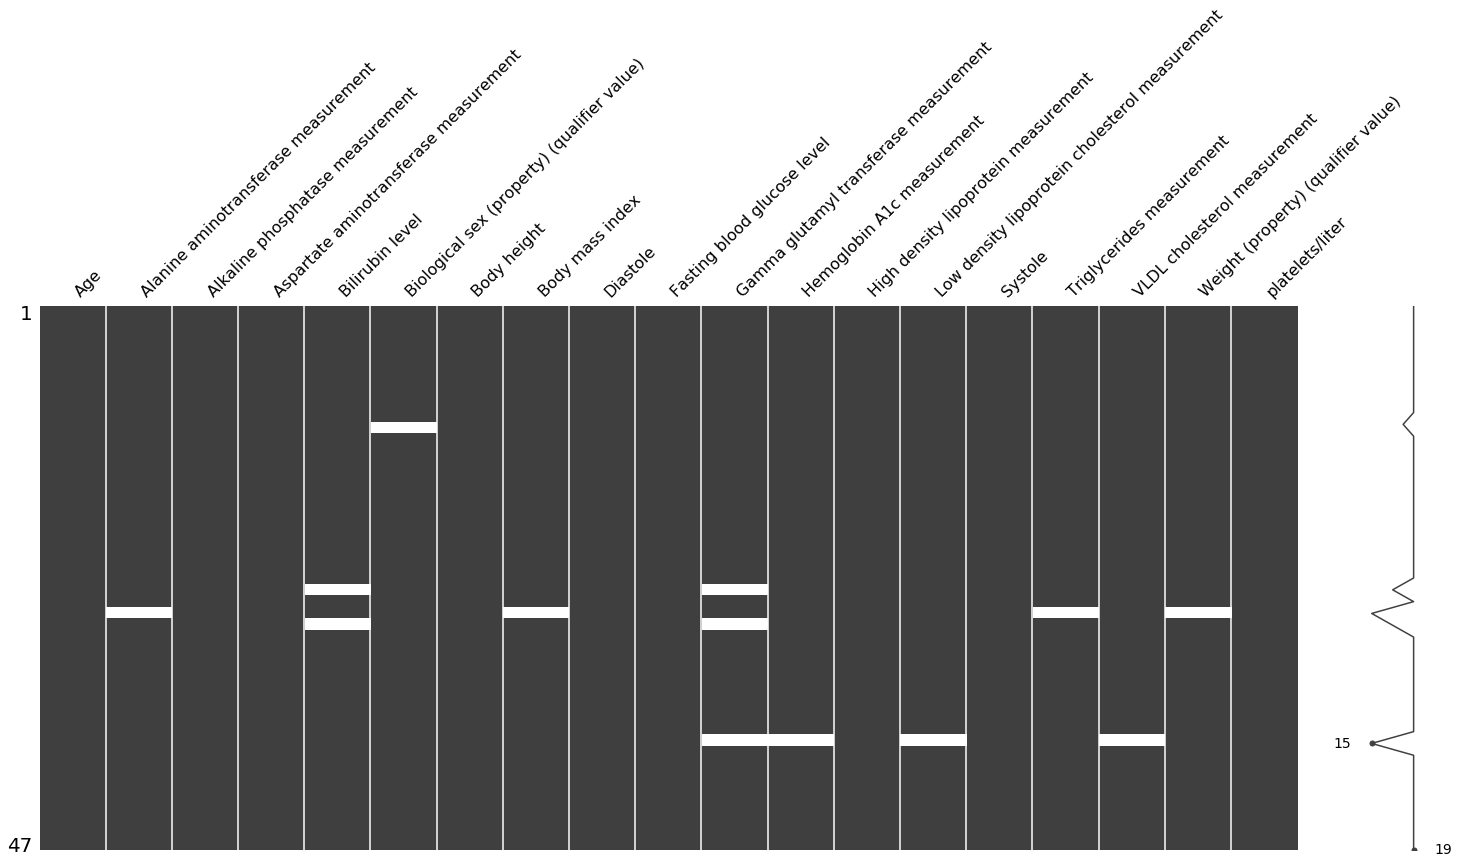

In [5]:
clin_dataset = clin_dataset.drop(['group'], axis=1).pivot_table(index='subject', columns='clinical_variable', values='value', aggfunc='first')
msno.matrix(clin_dataset)

### Proteomics dataset (original)

In [6]:
dataset = p.get_dataset("proteomics").get_dataset("dataset")

In [7]:
dataset.head()

LFQ_intensity      group identifier     name sample
0       7.837847  Cirrhosis     S6BGE9            AS76
1       6.839910  Cirrhosis     Q9Y5C1  ANGPTL3   AS76
2       8.392257  Cirrhosis     Q9UL90            AS76
3       8.309295  Cirrhosis     Q9UL89            AS76
4       7.904283  Cirrhosis     S6B294            AS76

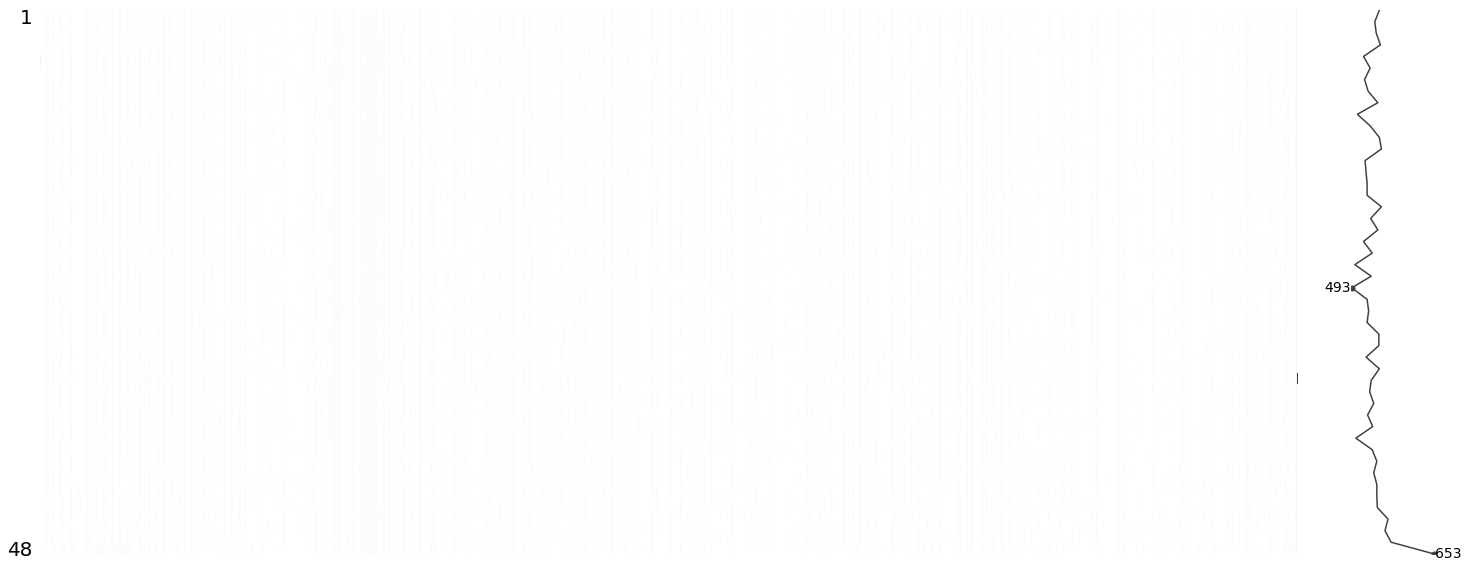

In [8]:
dataset = dataset.drop(['group'], axis=1).pivot_table(index='sample', columns='identifier', values='LFQ_intensity', aggfunc='first')
msno.matrix(dataset)

### Proteomics dataset (imputed)

In [9]:
reg_dataset = p.get_dataset("proteomics").get_dataset("regulated")
reg_dataset.head()

identifier  P19827-ITIH1  A0A0U1RR20-PRG4  P07359-GP1BA  P01833-PIGR  \
Cirrhosis      10.177911         8.259451      6.981855     7.222508   
Cirrhosis      10.149927         8.564382      7.398514     8.266091   
Cirrhosis      10.195678         8.259546      7.400279     8.543223   
Cirrhosis      10.074890         8.191563      7.293326     8.506884   
Cirrhosis      10.196314         8.251614      7.391553     7.797503   

identifier  A0A120HG46-  P04278-SHBG   A8K1K1-  P07686-HEXB  O43866-CD5L  \
Cirrhosis      9.323149     8.454036  8.331812     6.401015     8.762668   
Cirrhosis      9.548525     8.265172  8.356943     6.448639     8.716379   
Cirrhosis      9.447003     8.381584  8.396827     6.448010     8.912459   
Cirrhosis      9.716721     8.592477  8.180671     6.615266     8.895472   
Cirrhosis      9.406114     8.569889  7.940746     6.844421     8.939176   

identifier  A0A0C4DH38-IGHV5-51   ...    P01024-C3  P13671-C6  P02753-RBP4  \
Cirrhosis              8.981130   ...    11.348480   9.366311     8.750439   
Cirrhosis              9.189827   ...    11.303023   9.225361     8.780065   
Cirrhosis              9.178373   ...    11.377124   9.381963     8.764587   
Cirrhosis              9.311457   ...    11.325208   9.255875     8.468554   
Cirrhosis              9.184180   ...    11.258709   9.240749     8.686601   

identifier  P01591-JCHAIN   Q9UL94-  P22792-CPN2  Q6GMX6-IGH@  Q96IY4-CPB2  \
Cirrhosis        9.473560  8.157849     8.869607     8.318919     8.676200   
Cirrhosis        9.138650  8.385070     8.821291     8.792420     8.720068   
Cirrhosis        9.345178  7.927565     8.816347     8.284354     8.703300   
Cirrhosis        9.706624  8.158031     8.778499     8.810716     8.709787   
Cirrhosis        9.511108  8.030640     8.743886     8.498035     8.682921   

identifier   B3KSS4-  sample  
Cirrhosis   7.367617    AS68  
Cirrhosis   7.355933    AS69  
Cirrhosis   7.335326    AS70  
Cirrhosis   7.032171    AS71  
Cirrhosis   7.208226    AS72  

[5 rows x 47 columns]

In [37]:
result = analysisResult.AnalysisResult("Mapper analysis", analysis_type = "mapper", 
                           args = {"n_cubes": 15,
                                   "overlap": 0.85,
                                   "n_clusters": 2,
                                   "linkage": "single",
                                  "title":"Topological data analysis - Sample stratification"}, data=reg_dataset)
mapper_plot = result.get_plot(name="mapper", identifier="mapper_plot")[0]

In [38]:
iplot(mapper_plot.figure)

## Analyses results

#### Differential regulation

In [16]:
reg_table = p.get_dataset("proteomics").get_dataset("regulation_table")
reg_table.head()

identifier     group1           group2  log2FC   lower   upper  \
3   A0A0C4DH38-IGHV5-51  Cirrhosis              T2D -0.4135 -0.6421 -0.1849   
11      A0A0U1RR20-PRG4  Cirrhosis   NAFLD with NGT  0.3043  0.1117  0.4969   
12      A0A0U1RR20-PRG4  Cirrhosis  NAFLD with T2DM  0.2794  0.0868  0.4720   
21          A0A120HG46-  Cirrhosis   NAFLD with NGT -0.2759 -0.4435 -0.1082   
22          A0A120HG46-  Cirrhosis  NAFLD with T2DM -0.1912 -0.3589 -0.0236   

    rejected  t-statistics    pvalue  -Log pvalue      padj  
3       True      6.692432  0.000280     3.553162  0.010000  
11      True      6.372451  0.000405     3.392064  0.016923  
12      True      6.372451  0.000405     3.392064  0.016923  
21      True      7.174110  0.000162     3.791113  0.016667  
22      True      7.174110  0.000162     3.791113  0.016667